กดตรง copy to my drive ก่อนนะ ( อยู่ข้างบนมั้ง ) ไม่งั้นโค้ดทางนี้จะเปลี่ยนด้วย

# Import  lib

In [256]:
import tensorflow as tf
import numpy as np
from google.colab import drive
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

In [257]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from textwrap import wrap
from google.colab import drive
from tensorflow.keras.utils import plot_model

plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')

# Connect google drive

In [258]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PREPARE DATA ( change to your path )

place your captions path

In [260]:
file_path = "/content/drive/MyDrive/projectMLDL/text/data_for_ml_27_image.csv"

convert to csv format

In [261]:
df = pd.read_csv(file_path)

check unique image

In [262]:
np.unique(df["image"])

array(['190246_0.jpg', '190248_0.jpg', '190249.jpg', '192437_0.jpg',
       '192441_0.jpg', '192442_0.jpg', '192444_0.jpg', 'IMG_0225.JPG',
       'IMG_0226.JPG', 'IMG_0229.JPG', 'IMG_0230.JPG', 'IMG_0231.JPG',
       'IMG_0232.JPG', 'IMG_0233.JPG', 'IMG_0235.JPG', 'IMG_0257.JPG',
       'IMG_0258.jpg', 'IMG_0259.jpg', 'IMG_0386.JPG', 'IMG_0389.jpg',
       'IMG_0390.jpg', 'IMG_0391.jpg', 'IMG_20231007_141008.jpg',
       'IMG_25660913_083131.jpg', 'IMG_25660913_132501.jpg',
       'IMG_25660920_150148.jpg', 'line_1.jpg'], dtype=object)

In [263]:
df['image'].nunique()

27

Create variable
- store image column to images variable
- store captions column to captions variable

In [264]:
images = df['image']
captions = df['caption']

Check the first of start at 30 captions

In [265]:
captions[30:]

30           A man is wearing ? the earphone
31             A man is sitting on the chair
32              A man is cutting ? the model
33              A man is sitting in the room
34     The student is working near the table
                       ...                  
130                  Two man are tired ? ? ?
131                Two man are resting ? ? ?
132        A student are sleep  on the chair
133    The students are resting on the chair
134        A student is sitting on the chair
Name: caption, Length: 105, dtype: object

Replace ? with spacebar for every captions and store it into all_captions variable

In [266]:
all_captions = []

for caption in captions:
  caption_splited = ["" if word == "?" else word for word in caption.split()]
  all_captions.append(caption_splited)

check the value of all_captions

In [267]:
all_captions

[['The', 'student', 'is', 'sitting', 'on', 'the', 'chair'],
 ['A', 'man', 'is', 'playing', '', 'the', 'computer'],
 ['A', 'student', 'is', 'programming', 'on', 'the', 'computer'],
 ['A', 'student', 'is', 'working', 'on', '', 'Computer'],
 ['A', 'man', 'is', 'sitting', 'near', 'the', 'monitor'],
 ['Two', 'men', 'are', 'standing', 'near', 'the', 'table'],
 ['Two', 'men', 'are', 'working', 'near', 'the', 'table'],
 ['Two', 'men', 'are', 'standing', 'in', 'the', 'lab-room'],
 ['Two', 'student', 'are', 'standing', 'infrontof', 'the', 'table'],
 ['', 'Students', 'are', 'working', 'in', 'the', 'room'],
 ['A', 'man', 'is', 'walking', 'in', 'the', 'room'],
 ['A', 'man', 'is', 'walking', 'on', 'the', 'floor'],
 ['A', 'man', 'is', 'coming', 'to', 'the', 'room'],
 ['The', 'people', 'are', 'sitting', 'on', 'the', 'chair'],
 ['The', 'people', 'are', 'reading', '', 'the', 'book'],
 ['A', 'man', 'is', 'sitting', 'on', 'the', 'chair'],
 ['A', 'man', 'is', 'sitting', 'behind', 'the', 'table'],
 ['The', 

TO LOWER CASE AND STORE INTO THE LIST
- convert caption to lower case [ from A to a, from B to b, etc]
- store it into list [ We have 7 list for store every part of sentences ]

In [268]:
first_article = []
subject = []
verb_to_be = []
verb = []
preposition = []
second_article = []
objective = []

for caption in all_captions:
  first_article.append(caption[0].lower())
  subject.append(caption[1].lower())
  verb_to_be.append(caption[2].lower())
  verb.append(caption[3].lower())
  preposition.append(caption[4].lower())
  second_article.append(caption[5].lower())
  print(caption[6].lower())
  objective.append(caption[6].lower())


chair
computer
computer
computer
monitor
table
table
lab-room
table
room
room
floor
room
chair
book
chair
table
table
man
room
chair
room
hand
airconditioner
table
computer
computer
man
table
computer
earphone
chair
model
room
table
table
laptop
student
lab-room
laptop
classroom

classroom
project
table
boardgame
boardgame
table
boardgame
classroom

laptop
room
ground
laptop

table
classroom
table
class
ground

university
man
classroom
computer
computer

room
homework
whiteshirt
man
table
hands
table
room
woman
room
meeting
chair
computer
room
project
chair
room
chair
glasses
man

coat
chair
shirt
classroom
game
classroom


classroom
room

computer
room
homework
laptop
room
table

friends

laboratoryroom
ground
coat
twofingers

redcoat
boardgame
boardgame

boardgame
classroom
boardgame
boardgame
study
boardgame

boardgame
playing
playing
playing
boardgame


chair
chair
chair


STORE LIST OF SENTENCE'S PART TO DICTIONARY
- add word to list
    - add a, the to first_article
    - add I you we they to subject
    - add run stand sleep tp verb
    - .....
-then make it to unique such as [a, a, the, a == > a, the] (unique_categories variable)

In [269]:
first_article_copy = np.unique(first_article).copy()
subject_copy = np.unique(subject).copy()
verb_to_be_copy = np.unique(verb_to_be).copy()
verb_copy = np.unique(verb).copy()
preposition_copy = np.unique(preposition).copy()
second_article_copy = np.unique(second_article).copy()
objective_copy = np.unique(objective).copy()

Display value

In [270]:
print("first_article = ",len(np.unique(first_article_copy)))
print("subject_copy = ",len(np.unique(subject_copy)))
print("verb_to_be_copy = ",len(np.unique(verb_to_be_copy)))
print("verb_copy = ",len(np.unique(verb_copy)))
print("preposition_copy = ",len(np.unique(preposition_copy)))
print("second_article_copy = ",len(np.unique(second_article_copy)))
print("objective_copy = ",len(np.unique(objective_copy)))

first_article =  9
subject_copy =  13
verb_to_be_copy =  7
verb_copy =  42
preposition_copy =  17
second_article_copy =  8
objective_copy =  37


Check length of each part of sentences

USE LABEL ENCODER FOR ENCODE UNIQUE_CATEGORIES DATA

In [271]:
# Create a label encoder for each column
label_encoder_first_article = LabelEncoder()
label_encoder_subject = LabelEncoder()
label_encoder_verb_to_be = LabelEncoder()
label_encoder_verb = LabelEncoder()
label_encoder_preposition = LabelEncoder()
label_encoder_second_article = LabelEncoder()
label_encoder_objective = LabelEncoder()

#for name in categories.keys():
#  unique_categories[name] = lb.fit_transform(unique_categories[name])
print("first_article = ",len(np.unique(first_article_copy)))
print("subject_copy = ",len(np.unique(subject_copy)))
print("verb_to_be_copy = ",len(np.unique(verb_to_be_copy)))
print("verb_copy = ",len(np.unique(verb_copy)))
print("preposition_copy = ",len(np.unique(preposition_copy)))
print("second_article_copy = ",len(np.unique(second_article_copy)))
print("objective_copy = ",len(np.unique(objective_copy)))

label_first_article = []
label_subject = []
label_verb_to_be = []
label_verb = []
label_preposition = []
label_second_article = []
label_objective = []

first_article =  9
subject_copy =  13
verb_to_be_copy =  7
verb_copy =  42
preposition_copy =  17
second_article_copy =  8
objective_copy =  37


In [272]:
label_first_article = label_encoder_first_article.fit_transform(first_article_copy)
label_subject = label_encoder_subject.fit_transform(subject_copy)
label_verb_to_be = label_encoder_verb_to_be.fit_transform(verb_to_be_copy)
label_verb = label_encoder_verb.fit_transform(verb_copy)
label_preposition = label_encoder_preposition.fit_transform(preposition_copy)
label_second_article = label_encoder_second_article.fit_transform(second_article_copy)
label_objective = label_encoder_objective.fit_transform(objective_copy)

RESULT AFTER ENCODE

In [273]:
print("label_first_article = ",label_first_article)
print("label_subject = ",label_subject)
print("label_verb_to_be = ",label_verb_to_be)
print("label_verb = ",label_verb)
print("label_preposition = ",label_preposition)
print("label_second_article = ",label_second_article)
print("label_objective = ",label_objective)

label_first_article =  [0 1 2 3 4 5 6 7 8]
label_subject =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
label_verb_to_be =  [0 1 2 3 4 5 6]
label_verb =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
label_preposition =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
label_second_article =  [0 1 2 3 4 5 6 7]
label_objective =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]


CHECK LENGTH AGAIN

In [274]:
print("first_article = ",len(np.unique(first_article_copy)))
print("subject_copy = ",len(np.unique(subject_copy)))
print("verb_to_be_copy = ",len(np.unique(verb_to_be_copy)))
print("verb_copy = ",len(np.unique(verb_copy)))
print("preposition_copy = ",len(np.unique(preposition_copy)))
print("second_article_copy = ",len(np.unique(second_article_copy)))
print("objective_copy = ",len(np.unique(objective_copy)))

first_article =  9
subject_copy =  13
verb_to_be_copy =  7
verb_copy =  42
preposition_copy =  17
second_article_copy =  8
objective_copy =  37


In [275]:
All = np.sum([9,12,7,42,17,8,37])
print(All)

132


- FIRST SECTION
  - ENCODE VALUE OF EACH SENTENCE WITH LABEL ENCODER
- SECOND SECTION
  - CONVERT TO CATEGORICAL DATA OR ONE-HOT
  - such as [4, 2, 3] to
                         [
                          [0, 0, 0, 1],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0]
                         ]

In [276]:
article = tf.keras.utils.to_categorical(label_first_article, num_classes=len(label_first_article))
subject = tf.keras.utils.to_categorical(label_subject,  num_classes=len(label_subject))
verb_to_be = tf.keras.utils.to_categorical(label_verb_to_be, num_classes=len(label_verb_to_be))
verb = tf.keras.utils.to_categorical(label_verb, num_classes=len(label_verb))
preposition = tf.keras.utils.to_categorical(label_preposition, num_classes=len(label_preposition))
second_article = tf.keras.utils.to_categorical(label_second_article, num_classes=len(label_second_article))
objective = tf.keras.utils.to_categorical(label_objective, num_classes=len(label_objective))

In [277]:
print(subject)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


CREATE DATA FOR MAPPING VALUE FROM MODEL
  - important varialble are reverse_first_article, reverse_.......

In [278]:
# Reverse one-hot encoding for each category
reverse_first_article = sorted(label_encoder_first_article.inverse_transform(np.argmax(article, axis=1)))
reverse_subject = sorted(label_encoder_subject.inverse_transform(np.argmax(subject, axis=1)))
reverse_verb_to_be = sorted(label_encoder_verb_to_be.inverse_transform(np.argmax(verb_to_be, axis=1)))
reverse_verb = sorted(label_encoder_verb.inverse_transform(np.argmax(verb, axis=1)))
reverse_preposition = sorted(label_encoder_preposition.inverse_transform(np.argmax(preposition, axis=1)))
reverse_second_article = sorted(label_encoder_second_article.inverse_transform(np.argmax(second_article, axis=1)))
reverse_objective = sorted(label_encoder_objective.inverse_transform(np.argmax(objective, axis=1)))

# Print the results
print("Reverse First Article:", reverse_first_article)
print("Reverse Subject:", reverse_subject)
print("Reverse Verb to Be:", reverse_verb_to_be)
print("Reverse Verb:", reverse_verb)
print("Reverse Preposition:", reverse_preposition)
print("Reverse Second Article:", reverse_second_article)
print("Reverse Objective:", reverse_objective)

Reverse First Article: ['', 'a', 'four', 'many', 'one', 'the', 'three', 'threee', 'two']
Reverse Subject: ['bag', 'bottle', 'char', 'computer', 'laptop', 'man', 'men', 'people', 'student', 'students', 'table', 'team', 'wire']
Reverse Verb to Be: ['', 'are', 'do', 'has', 'is', 'thumbs', 'thump']
Reverse Verb: ['', 'are', 'been', 'collecting', 'coming', 'cutting', 'discussing', 'doing', 'eating', 'enjoy', 'full', 'funning', 'happy', 'having', 'holding', 'hungry', 'is', 'place', 'playing', 'pointing', 'programming', 'project', 'reading', 'relax', 'resting', 'rise', 'serious', 'sitting', 'sleep', 'smile', 'standing', 'studing', 'studying', 'talking', 'tired', 'up', 'use', 'used', 'waitting', 'walking', 'wearing', 'working']
Reverse Preposition: ['', 'about', 'after', 'around', 'at', 'behind', 'by', 'for', 'front', 'in', 'infrontof', 'near', 'on', 'sitting', 'to', 'when', 'with']
Reverse Second Article: ['', 'a', 'black', 'blue', 'by', 'his', 'laboratory', 'the']
Reverse Objective: ['', 'ai

CREATE OUTPUT VALUE FOR TRAINING MODEL
  - if original sentence is "I am sitting"
  - it have 4 part if each part have  
      - 1st part [ I, you we they ]
      - 2nd part [ is, am, are ]
      - 3rd part [ stand, sitting ]
  - output in y_train is [0, 1, 1]
    - 0 is position of "I" in 1st part
    - 1 is position of "am" in 2nd part
    - 1 is position of "sitting" in 3rd part

In [313]:
label_first_article = np.array(label_first_article)
label_first_article

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [314]:
from array import array

# Assuming you have a DataFrame called unique_categories
categories = {
    'first_article': [],
    'subject': [],
    'verb_to_be': [],
    'verb': [],
    'preposition': [],
    'second_article': [],
    'objective': []
}

for caption in all_captions:
    for i, category in enumerate(categories.keys()):
        categories[category].append(caption[i])

categories['first_article'].append(label_first_article)
categories['subject'].append(label_subject)
categories['verb_to_be'].append(label_verb_to_be)
categories['verb'].append(label_verb)
categories['preposition'].append(label_preposition)
categories['second_article'].append(label_second_article)
categories['objective'].append(label_objective)

In [315]:
def create_data():
  y = []
  for n in range(len(categories["first_article"])):
    y.append([categories["first_article"][n],
              categories["subject"][n],
              categories["verb_to_be"][n],
              categories["verb"][n],
              categories["preposition"][n],
              categories["second_article"][n],
              categories["objective"][n]])
  return np.array(y)

y_train = create_data()

In [316]:
y_train

array([[array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
        array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
        array([0, 1, 2, 3, 4, 5, 6]),
        array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41])                                   ,
        array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
        array([0, 1, 2, 3, 4, 5, 6, 7]),
        array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36])                                                       ]],
      dtype=object)

In [317]:
y_train.shape

(1, 7)

LOAD OUR IMAGE AND TRAIN WITH DENSENET (Pretrain model)
  - we will grab value from node before last node
    - we want just value after calculate by neuron network ( use neuron network for summary our image data)
    - we don't want predict value from last node
    

# TRAIN IMAGE DATA ( change to your path )

In [282]:
image_path = "/content/drive/MyDrive/projectMLDL/img"

In [283]:
model = DenseNet201()
# model = DenseNet201(weights='imagenet', include_top=False)
fe = Model(inputs=model.input, outputs=model.layers[-2].output)

img_size = 224
features = []
for image in tqdm(df['image'].unique().tolist()):
    img = load_img(os.path.join(image_path,image),target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    img = np.expand_dims(img,axis=0)
    feature = fe.predict(img, verbose=0)
    features.append(list(feature))

100%|██████████| 27/27 [00:09<00:00,  2.96it/s]


In [284]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.densenet import DenseNet201, preprocess_input
from keras.models import Model
import os
import numpy as np
from tqdm import tqdm

model = DenseNet201(weights='imagenet', include_top=True)

# Create a feature extraction model
fe = Model(inputs=model.input, outputs=model.layers[-2].output)

img_size = 224
batch_size = 32  # You can adjust this based on your available memory

features = []

for image in tqdm(df['image'].unique().tolist()):
    img_path = os.path.join(image_path, image)
    img = load_img(img_path, target_size=(img_size, img_size))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)  # Use DenseNet201's preprocessing function
    features.append(fe.predict(img, verbose=0))

# Convert the features list to a NumPy array
features = np.vstack(features)

100%|██████████| 27/27 [00:08<00:00,  3.10it/s]


change to numpy array

In [285]:
features = np.array(features)

In [286]:
features.shape

(27, 1920)

reshape for model training

In [287]:
features = np.array(features).reshape(features.shape[0], 1920,)

STORE IMAGE VALUE AFTER TRAIN WITH DENSENET TO X VARIABLE

In [288]:
X = []

for idx, image in enumerate(features):
  for i in range(5):
    X.append(image)

In [289]:
X = np.array(X)

In [290]:
print(X.shape)

(135, 1920)


# PREPARE DATA FOR TRAINING

In [291]:
input_data = {
    "image_feature": X,
    "captions": y_train
}

output_data = {
    "article": article,
    "subject": subject,
    "verb_to_be": verb_to_be,
    "verb": verb,
    "prep": preposition,
    "article2": second_article,
    "objective": objective
}

# MODEL

LSTM MODEL

In [292]:
import tensorflow as tf

image_features = tf.keras.layers.Input(shape=(1920,), name="image_feature")

captions = tf.keras.layers.Input(shape=(7,), name="captions")

caption_embedding = tf.keras.layers.Embedding(input_dim=123, output_dim=256)(captions)

captions_lstm = tf.keras.layers.LSTM(256)(caption_embedding)

captions_lstm = tf.keras.layers.Dense(256)(captions_lstm)

merged = tf.keras.layers.concatenate([image_features, captions_lstm], axis=-1)

x = tf.keras.layers.Dense(128, activation="relu")(merged)
# x = tf.keras.layers.Dense(64, activation="relu")(merged)
x = tf.keras.layers.Dropout(0.3)(x)

article_layer = tf.keras.layers.Dense(13, activation="softmax", name="article")(x)
subject_layer = tf.keras.layers.Dense(18, activation="softmax", name="subject")(x)
verb_to_be_layer = tf.keras.layers.Dense(7, activation="softmax", name="verb_to_be")(x)
verb_layer = tf.keras.layers.Dense(43, activation="softmax", name="verb")(x)
preposition_layer = tf.keras.layers.Dense(17, activation="softmax", name="prep")(x)
second_article_layer = tf.keras.layers.Dense(10, activation="softmax", name="article2")(x)
objective_layer = tf.keras.layers.Dense(45, activation="softmax", name="objective")(x)


caption_model = tf.keras.models.Model(inputs=[image_features, captions], outputs=[article_layer, subject_layer, verb_to_be_layer, verb_layer, preposition_layer, second_article_layer, objective_layer])

CNN MODE NOW THIS MODEL IS HIGH PERFORMANCE

In [293]:
import tensorflow as tf

image_features = tf.keras.layers.Input(shape=(1920,), name="image_feature")
captions = tf.keras.layers.Input(shape=(7,), name="captions")

captions_reshaped = tf.keras.layers.Reshape((7, 1))(captions)

caption_conv1d_1 = tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu')(captions_reshaped)
caption_maxpool_1 = tf.keras.layers.GlobalMaxPooling1D()(caption_conv1d_1)

merged = tf.keras.layers.concatenate([image_features, caption_maxpool_1], axis=-1)

x = tf.keras.layers.Dense(128, activation="relu")(merged)
x = tf.keras.layers.Dropout(0.3)(x)

caption_conv1d_2 = tf.keras.layers.Conv1D(128, kernel_size=3, activation='relu')(captions_reshaped)
caption_maxpool_2 = tf.keras.layers.GlobalMaxPooling1D()(caption_conv1d_2)

merged_2 = tf.keras.layers.concatenate([image_features, caption_maxpool_2], axis=-1)

x_2 = tf.keras.layers.Dense(64, activation="relu")(merged_2)
x_2 = tf.keras.layers.Dropout(0.2)(x_2)

x_3 = tf.keras.layers.Dense(32, activation="relu")(x_2)
x_3 = tf.keras.layers.Dropout(0.2)(x_3)

article_layer = tf.keras.layers.Dense(13, activation="softmax", name="article")(x_3)
subject_layer = tf.keras.layers.Dense(18, activation="softmax", name="subject")(x_3)
verb_to_be_layer = tf.keras.layers.Dense(7, activation="softmax", name="verb_to_be")(x_3)
verb_layer = tf.keras.layers.Dense(43, activation="softmax", name="verb")(x_3)
preposition_layer = tf.keras.layers.Dense(17, activation="softmax", name="prep")(x_3)
second_article_layer = tf.keras.layers.Dense(10, activation="softmax", name="article2")(x_3)
objective_layer = tf.keras.layers.Dense(45, activation="softmax", name="objective")(x_3)

caption_model = tf.keras.models.Model(inputs=[image_features, captions], outputs=[article_layer, subject_layer, verb_to_be_layer, verb_layer, preposition_layer, second_article_layer, objective_layer])

In [294]:
import tensorflow as tf

image_features = tf.keras.layers.Input(shape=(1920,), name="image_feature")
captions = tf.keras.layers.Input(shape=(7,), name="captions")

captions_reshaped = tf.keras.layers.Reshape((7, 1))(captions)

caption_conv1d_1 = tf.keras.layers.Conv1D(256, kernel_size=3, activation='relu')(captions_reshaped)
caption_maxpool_2 = tf.keras.layers.GlobalMaxPooling1D()(caption_conv1d_1)

merged = tf.keras.layers.concatenate([image_features, caption_maxpool_2], axis=-1)

x_2 = tf.keras.layers.Dense(128, activation="sigmoid")(merged)
x_2 = tf.keras.layers.Dropout(0.2)(x_2)

x_3 = tf.keras.layers.Dense(64, activation="sigmoid")(x_2)
x_3 = tf.keras.layers.Dropout(0.2)(x_3)

article_layer = tf.keras.layers.Dense(13, activation="softmax", name="article")(x_3)
subject_layer = tf.keras.layers.Dense(18, activation="softmax", name="subject")(x_3)
verb_to_be_layer = tf.keras.layers.Dense(7, activation="softmax", name="verb_to_be")(x_3)
verb_layer = tf.keras.layers.Dense(43, activation="softmax", name="verb")(x_3)
preposition_layer = tf.keras.layers.Dense(17, activation="softmax", name="prep")(x_3)
second_article_layer = tf.keras.layers.Dense(10, activation="softmax", name="article2")(x_3)
objective_layer = tf.keras.layers.Dense(40, activation="softmax", name="objective")(x_3)

caption_model = tf.keras.models.Model(inputs=[image_features, captions], outputs=[article_layer, subject_layer, verb_to_be_layer, verb_layer, preposition_layer, second_article_layer, objective_layer])

DISPLAY MODEL ARCHITECTURE

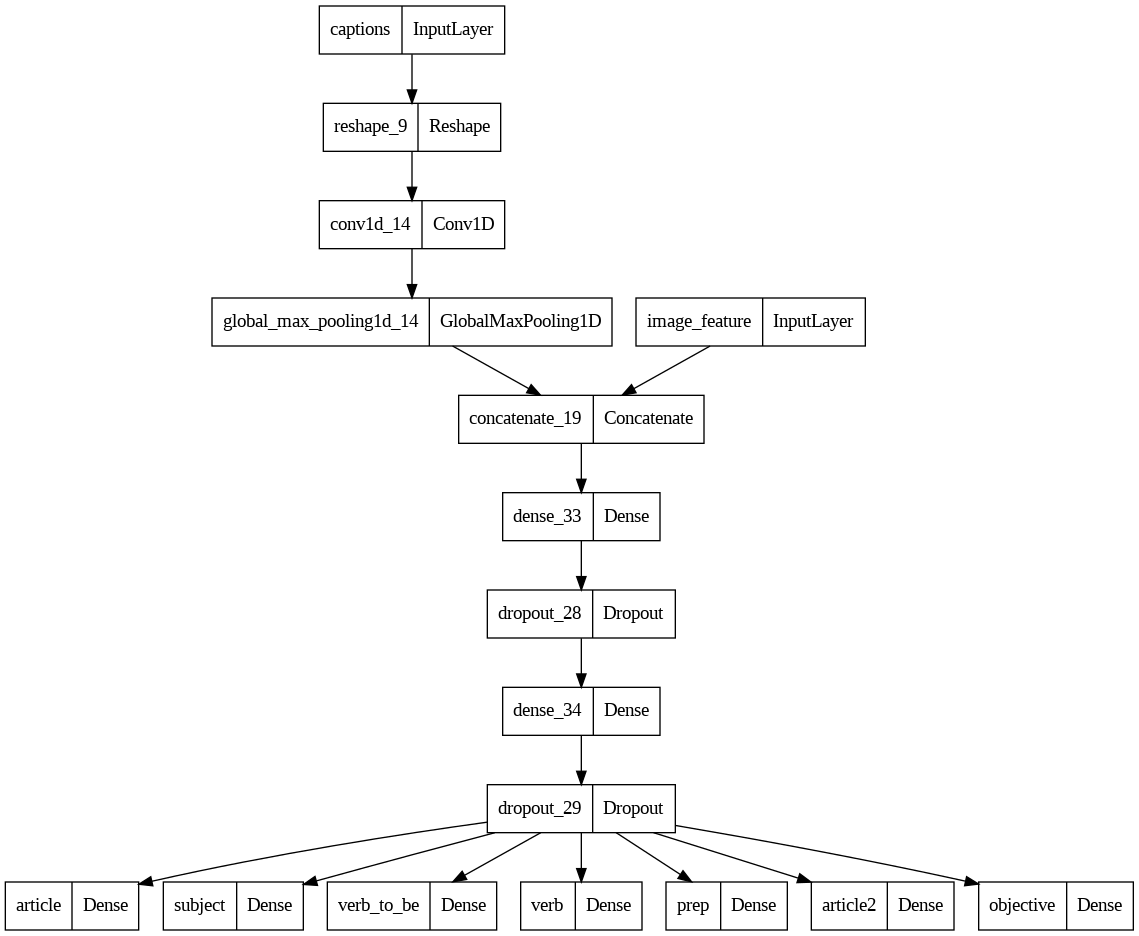

In [295]:
plot_model(caption_model)

CREATE TRAIN DATA
  - WE HAVE 2 INPUT
  - WE HAVE 7 OUTPUT

# TRAIN ( select 1 option )

TRAIN WITH EARLY STOPPING

In [296]:
input_data['image_feature'].shape

(135, 1920)

In [297]:
input_data['captions'].shape

(1, 7)

In [307]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
caption_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
history = caption_model.fit(
        input_data, output_data,
        callbacks = [callback],
        batch_size=64,
        epochs=1000)

ValueError: ignored

# TEST OUR MODEL

In [ ]:
img_size = 224

image = plt.imread("/content/drive/MyDrive/projectMLDL/img/IMG_0230.JPG")
img = load_img(os.path.join("/content/drive/MyDrive/projectMLDL/img/", "IMG_0230.JPG"),target_size=(img_size,img_size))
img = img_to_array(img)
img = img/255.
img = np.expand_dims(img,axis=0)
feature = fe.predict(img, verbose=0)
plt.imshow(image)

In [ ]:
import numpy as np

n = 80
#image_features_data = X[n].reshape(1, -1)
image_features_data = feature
data = np.reshape(image_features_data[0], (1, 1920))
captions_data = np.zeros((1, 7))

predictions = caption_model.predict([data, captions_data], verbose=0)

article_prediction = predictions[0]
subject_prediction = predictions[1]
verb_to_be_prediction = predictions[2]
verb_prediction = predictions[3]
preposition_prediction = predictions[4]
second_article_prediction = predictions[5]
objective_prediction = predictions[6]

print(captions[n])
print(reverse_first_article[np.argmax(article_prediction)], end=" ")
print(reverse_subject[np.argmax(subject_prediction)], end=" ")
print(reverse_verb_to_be[np.argmax(verb_to_be_prediction)], end=" ")
print(reverse_verb[np.argmax(verb_prediction)], end=" ")
print(reverse_preposition[np.argmax(preposition_prediction)], end=" ")
print(reverse_second_article[np.argmax(second_article_prediction)], end=" ")
print(reverse_objective[np.argmax(objective_prediction)], end=" ")

# Model Evaluation with BLEU

In [ ]:
def space_to_question_mark(word):
  if word == "":
    return "?"
  return word

In [ ]:
predict = []

for i in tqdm(range(int(X.shape[0]))):
  image_features_data = X[i].reshape(1, -1)
  data = np.reshape(image_features_data[0], (1, 1920))
  captions_data = np.zeros((1, 7))

  predictions = caption_model.predict([data, captions_data], verbose=0)

  article_prediction = predictions[0]
  subject_prediction = predictions[1]
  verb_to_be_prediction = predictions[2]
  verb_prediction = predictions[3]
  preposition_prediction = predictions[4]
  second_article_prediction = predictions[5]
  objective_prediction = predictions[6]

  caption_predicted = space_to_question_mark(reverse_first_article[np.argmax(article_prediction)]) + " " + space_to_question_mark(reverse_subject[np.argmax(subject_prediction)]) + " " + space_to_question_mark(reverse_verb_to_be[np.argmax(verb_to_be_prediction)]) + " " + space_to_question_mark(reverse_verb[np.argmax(verb_prediction)]) + " " + space_to_question_mark(reverse_preposition[np.argmax(preposition_prediction)]) + " " + space_to_question_mark(reverse_second_article[np.argmax(second_article_prediction)]) + " " + space_to_question_mark(reverse_objective[np.argmax(objective_prediction)])
  predict.append(caption_predicted)

In [ ]:
captions = df['caption']

In [ ]:
predict_splited = []
actual_splited = []
for i, p in enumerate(predict):
  predict_splited.append(predict[i].split())
  actual_splited.append([captions[i].split()])

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('perluniprops')

from nltk.translate.bleu_score import corpus_bleu

bleu_score = corpus_bleu(actual_splited, predict_splited)

print(f"BLEU Score: {bleu_score}")